In [10]:
# Install required packages
%pip install nixtla pandas numpy matplotlib python-dotenv


You should consider upgrading via the '/Users/martinliu/.pyenv/versions/3.9.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dotenv import load_dotenv
from nixtla import NixtlaClient

# Load environment variables
load_dotenv()

print("Libraries imported successfully!")


Libraries imported successfully!


In [12]:
# Initialize the TimeGPT client with API key from environment
api_key = os.getenv('TIME_GPT_API_KEY')

if not api_key:
    raise ValueError("TIME_GPT_API_KEY not found in environment variables. Please check your .env file.")

nixtla_client = NixtlaClient(api_key=api_key)

print("TimeGPT client initialized successfully!")
print(f"API Key loaded: {'*' * (len(api_key) - 8) + api_key[-8:]}")


TimeGPT client initialized successfully!
API Key loaded: ******************************************************************************XRB7XGau


In [13]:
# Validate the API key
try:
    validation_result = nixtla_client.validate_api_key()
    print("✅ API Key is valid!")
    print(f"Validation result: {validation_result}")
except Exception as e:
    print(f"❌ API Key validation failed: {e}")


INFO:nixtla.nixtla_client:Happy Forecasting! :)


✅ API Key is valid!
Validation result: True


In [14]:
# Generate sample energy market data
def generate_energy_market_data(days=365):
    """Generate synthetic energy market data with realistic patterns"""
    
    # Create date range
    start_date = datetime.now() - timedelta(days=days)
    dates = pd.date_range(start=start_date, periods=days*24, freq='H')
    
    # Generate energy prices with realistic patterns
    np.random.seed(42)
    
    # Base price with trend
    base_price = 0.08 + np.linspace(0, 0.02, len(dates))
    
    # Daily seasonality (higher during day, lower at night)
    hours = dates.hour
    daily_pattern = 0.02 * np.sin(2 * np.pi * (hours - 6) / 24)
    
    # Weekly seasonality (higher on weekdays)
    weekdays = dates.weekday
    weekly_pattern = 0.01 * (weekdays < 5).astype(float)
    
    # Random noise
    noise = np.random.normal(0, 0.005, len(dates))
    
    # Combine all components
    energy_prices = base_price + daily_pattern + weekly_pattern + noise
    
    # Ensure prices are positive
    energy_prices = np.maximum(energy_prices, 0.01)
    
    # Create DataFrame in TimeGPT format
    df = pd.DataFrame({
        'ds': dates,
        'y': energy_prices,
        'unique_id': 'energy_price'
    })
    
    return df

# Generate the data
energy_data = generate_energy_market_data(days=90)

print(f"Generated {len(energy_data)} data points")
print("\nFirst 5 rows:")
print(energy_data.head())

print("\nData info:")
print(energy_data.info())


Generated 2160 data points

First 5 rows:
                          ds         y     unique_id
0 2025-03-23 12:00:54.796097  0.102484  energy_price
1 2025-03-23 13:00:54.796097  0.098636  energy_price
2 2025-03-23 14:00:54.796097  0.100577  energy_price
3 2025-03-23 15:00:54.796097  0.101785  energy_price
4 2025-03-23 16:00:54.796097  0.088866  energy_price

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         2160 non-null   datetime64[ns]
 1   y          2160 non-null   float64       
 2   unique_id  2160 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 50.8+ KB
None


/var/folders/mq/1w_tgsq53vv0rgs3pzk14wqc0000gn/T/ipykernel_47488/3700909682.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start=start_date, periods=days*24, freq='H')


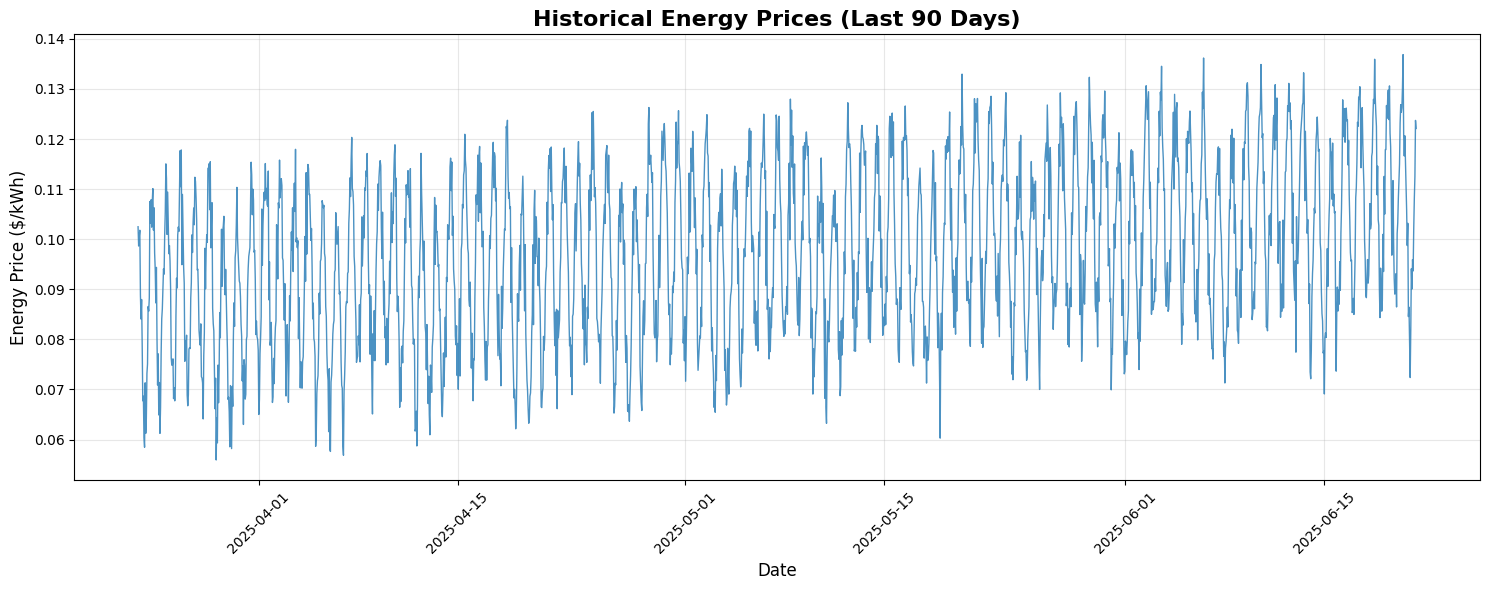

Energy Price Statistics:
Mean: $0.0974/kWh
Std:  $0.0166/kWh
Min:  $0.0559/kWh
Max:  $0.1369/kWh


In [15]:
# Plot the historical data
plt.figure(figsize=(15, 6))
plt.plot(energy_data['ds'], energy_data['y'], linewidth=1, alpha=0.8)
plt.title('Historical Energy Prices (Last 90 Days)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Price ($/kWh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show basic statistics
print("Energy Price Statistics:")
print(f"Mean: ${energy_data['y'].mean():.4f}/kWh")
print(f"Std:  ${energy_data['y'].std():.4f}/kWh")
print(f"Min:  ${energy_data['y'].min():.4f}/kWh")
print(f"Max:  ${energy_data['y'].max():.4f}/kWh")


In [16]:
# Generate forecast for next 24 hours
horizon = 24  # Forecast 24 hours ahead

print(f"Generating {horizon}-hour forecast using TimeGPT...")

try:
    # Generate forecast with confidence intervals
    forecast_df = nixtla_client.forecast(
        df=energy_data,
        h=horizon,
        time_col='ds',
        target_col='y',
        level=[80, 95]  # 80% and 95% confidence intervals
    )
    
    print("✅ Forecast generated successfully!")
    print(f"\nForecast shape: {forecast_df.shape}")
    print(f"Forecast columns: {list(forecast_df.columns)}")
    print("\nFirst 5 forecast points:")
    print(forecast_df.head())
    
except Exception as e:
    print(f"❌ Forecast generation failed: {e}")
    forecast_df = None


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...


Generating 24-hour forecast using TimeGPT...


INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


✅ Forecast generated successfully!

Forecast shape: (24, 7)
Forecast columns: ['unique_id', 'ds', 'TimeGPT', 'TimeGPT-hi-80', 'TimeGPT-hi-95', 'TimeGPT-lo-80', 'TimeGPT-lo-95']

First 5 forecast points:
      unique_id                         ds   TimeGPT  TimeGPT-hi-80  \
0  energy_price 2025-06-21 12:00:54.796097  0.123661       0.128501   
1  energy_price 2025-06-21 13:00:54.796097  0.123944       0.131369   
2  energy_price 2025-06-21 14:00:54.796097  0.119065       0.124114   
3  energy_price 2025-06-21 15:00:54.796097  0.117087       0.122131   
4  energy_price 2025-06-21 16:00:54.796097  0.116105       0.122350   

   TimeGPT-hi-95  TimeGPT-lo-80  TimeGPT-lo-95  
0       0.131119       0.118821       0.116203  
1       0.133511       0.116518       0.114376  
2       0.129196       0.114015       0.108933  
3       0.129460       0.112042       0.104713  
4       0.126970       0.109859       0.105239  


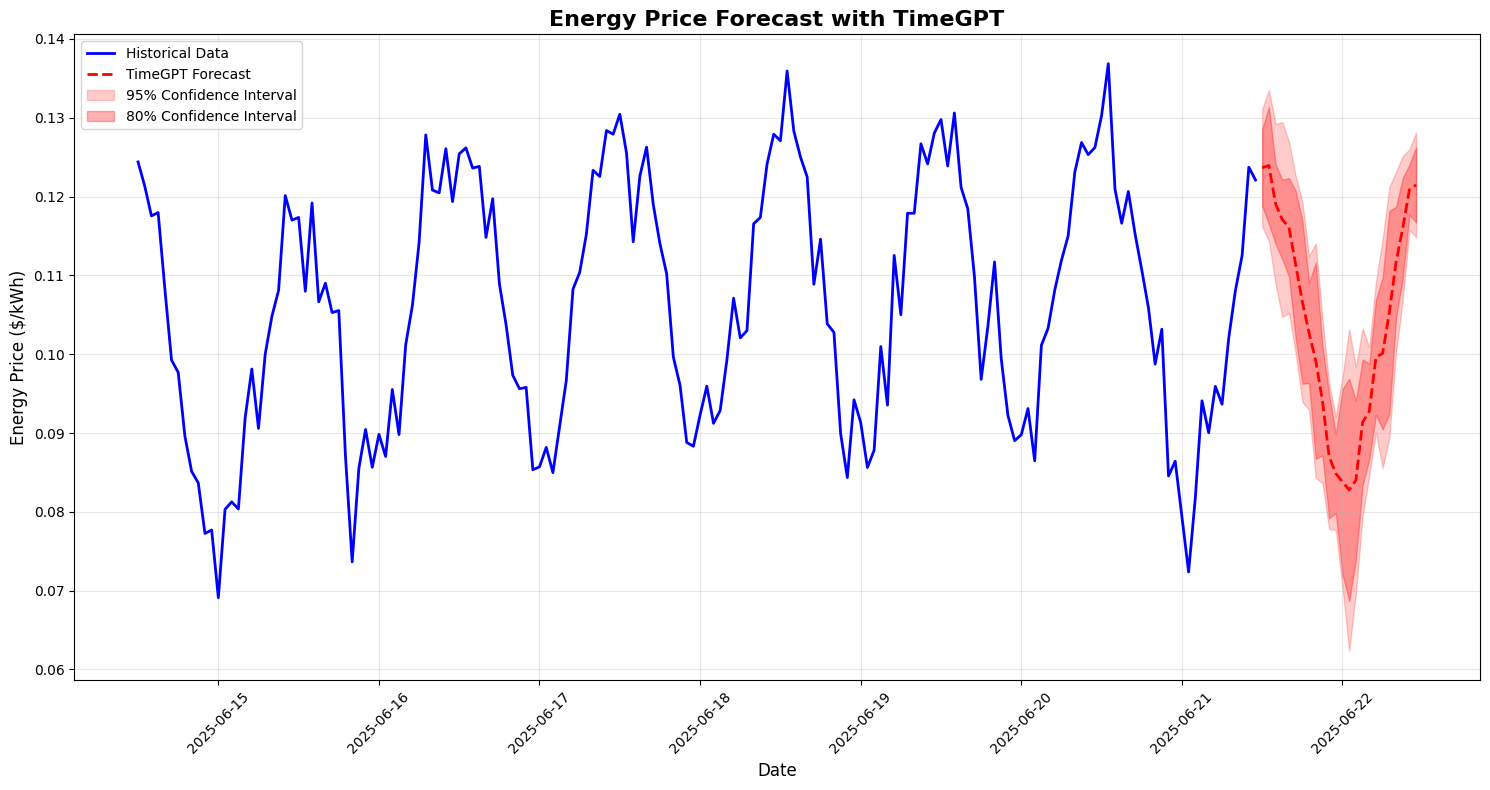


📊 Forecast Summary:
Forecasted mean price: $0.1040/kWh
Forecasted min price:  $0.0828/kWh
Forecasted max price:  $0.1239/kWh
Price volatility (std): $0.0140/kWh


In [17]:
# Plot historical data and forecasts
if forecast_df is not None:
    plt.figure(figsize=(15, 8))
    
    # Plot last 7 days of historical data
    recent_data = energy_data.tail(7*24)
    plt.plot(recent_data['ds'], recent_data['y'], 
             label='Historical Data', color='blue', linewidth=2)
    
    # Plot forecast
    plt.plot(forecast_df['ds'], forecast_df['TimeGPT'], 
             label='TimeGPT Forecast', color='red', linewidth=2, linestyle='--')
    
    # Plot confidence intervals if available
    if 'TimeGPT-lo-95' in forecast_df.columns:
        plt.fill_between(forecast_df['ds'], 
                        forecast_df['TimeGPT-lo-95'], 
                        forecast_df['TimeGPT-hi-95'],
                        alpha=0.2, color='red', label='95% Confidence Interval')
    
    if 'TimeGPT-lo-80' in forecast_df.columns:
        plt.fill_between(forecast_df['ds'], 
                        forecast_df['TimeGPT-lo-80'], 
                        forecast_df['TimeGPT-hi-80'],
                        alpha=0.3, color='red', label='80% Confidence Interval')
    
    plt.title('Energy Price Forecast with TimeGPT', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Energy Price ($/kWh)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print forecast summary
    print("\n📊 Forecast Summary:")
    print(f"Forecasted mean price: ${forecast_df['TimeGPT'].mean():.4f}/kWh")
    print(f"Forecasted min price:  ${forecast_df['TimeGPT'].min():.4f}/kWh")
    print(f"Forecasted max price:  ${forecast_df['TimeGPT'].max():.4f}/kWh")
    print(f"Price volatility (std): ${forecast_df['TimeGPT'].std():.4f}/kWh")
else:
    print("No forecast data available for visualization.")
